In [33]:
import jax
import netket as nk
import numpy as np
from netket.operator.spin import sigmax,sigmaz, sigmap, sigmam, identity
import time
from scipy.sparse.linalg import eigsh
import jax.numpy as jnp
import matplotlib.pyplot as plt
# from twoD_tool import *
from twoD_tool_Rydberg import *


L = 4
N = L*L
periodic = False
hi = nk.hilbert.Spin(s=1 / 2, N =  N)
model = "2DRydberg"

int_ = "delta"
params = [0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4 ] #delta
params = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #delta
# params = [0.1, 0.3, 0.5, 0.7, 0.9] #delta

for param in params :
    if model == "2DRydberg":
        Omega = 1.0
        Rb = 1.2
        H = Omega/2*sum([sigmax(hi, y*L+x) for y in range (L) for x in range (L)]) #X
        H -= param/2*sum([(identity(hi)-sigmaz(hi, y*L+x)) for y in range(L) for x in range(L)])
        H += Omega*Rb**6/4*sum([((identity(hi)-sigmaz(hi, y1*L+x1))*(identity(hi)-sigmaz(hi, y1*L+x2)))/((x1-x2)**2)**3 \
                             for y1 in range(L) for x1 in range(L) for x2 in range(x1+1, L)])
        H += Omega*Rb**6/4*sum([((identity(hi)-sigmaz(hi, y1*L+x1))*(identity(hi)-sigmaz(hi, y2*L+x2)))/(((x1-x2)**2+(y1-y2)**2)**3) \
                             for y1 in range(L) for x1 in range(L) for y2 in range(y1+1, L) for x2 in range(L)])
    sp_h = H.to_sparse()
    eig_vals, eig_vecs = eigsh(sp_h, k=2, which="SA")
    print("eigenvalues with scipy sparse " +int_+"="+str(param) +":", eig_vals)
    prob_exact = eig_vecs[:,0]**2
    mag = np.sum(prob_exact*count_diff_ones_zeros(L**2))
    magH = sum([sigmaz(hi, y*L+x) for y in range(L) for x in range (L)])
    mag1 = eig_vecs[:,0] @ magH.to_sparse() @ eig_vecs[:,0]
    print(mag, mag1)
    shape = (2,) * (L**2)
    prob_exact = prob_exact.reshape(*shape)
    mean_corr, var_corr = correlation_all(prob_exact, L)
    cmi = cmi_(prob_exact, L)
    cmi_all = cmi_traceout(prob_exact, L)

    if model == "2DRydberg":
        stagger_H = sum([sigmaz(hi, y*L+x)*(-1)**(y*L+x) for y in range(L) for x in range (L)])
        stagger_mag = np.abs(eig_vecs[:,0].conj() @ stagger_H.to_sparse() @ eig_vecs[:,0])
        print(stagger_mag)
    np.save("result/"+model+"/gap_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", np.array(eig_vals[1]-eig_vals[0]))
    np.save("result/"+model+"/cmi_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", cmi)
    np.save("result/"+model+"/mean_corr_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", mean_corr)
    np.save("result/"+model+"/var_corr_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", var_corr)
    np.save("result/"+model+"/cmi_traceout_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", cmi_all)
    np.save("result/"+model+"/mag_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", mag)
    np.save("result/"+model+"/stagger_mag_"+model+"_L"+str(L)+"_"+int_+"_"+str(param)+"periodic_"+str(periodic)+".npy", stagger_mag)

eigenvalues with scipy sparse delta=0.1: [-5.05690704 -4.35344022]
-10.11173638046248 10.111736380462414
6.933342788784103e-14


/Users/mehdisoleimanifar/anaconda3/lib/python3.10/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


eigenvalues with scipy sparse delta=0.2: [-5.36032476 -4.71464492]
-9.750123994342976 9.750123994343102
4.440892098500626e-16
eigenvalues with scipy sparse delta=0.3: [-5.68202452 -5.09272744]
-9.380716511607305 9.380716511607273
1.687538997430238e-14
eigenvalues with scipy sparse delta=0.4: [-6.02235781 -5.48816299]
-9.005018522188484 9.005018522188662
3.469446951953614e-14
eigenvalues with scipy sparse delta=0.5: [-6.38160643 -5.90135856]
-8.624279025934085 8.6242790259342
1.3655743202889425e-14
eigenvalues with scipy sparse delta=0.6: [-6.76000089 -6.33265324]
-8.239254384150877 8.239254384150883
2.6645352591003757e-15
eigenvalues with scipy sparse delta=0.7: [-7.15775241 -6.78232311]
-7.849905172375794 7.849905172375906
7.66053886991358e-15
eigenvalues with scipy sparse delta=0.8: [-7.57510182 -7.25058997]
-7.45501480569873 7.45501480569873
1.7208456881689926e-14
eigenvalues with scipy sparse delta=0.9: [-8.01238955 -7.73763158]
-7.051738007224691 7.0517380072246665
3.6637359812630

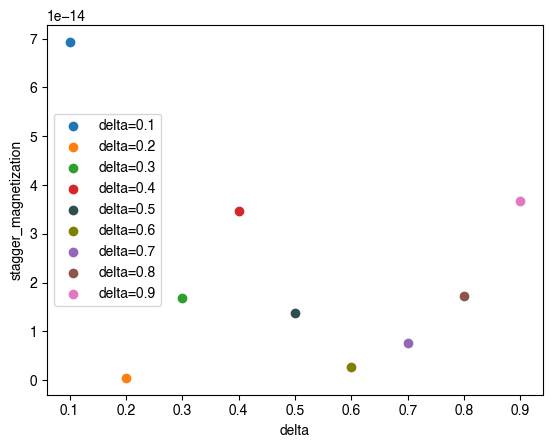

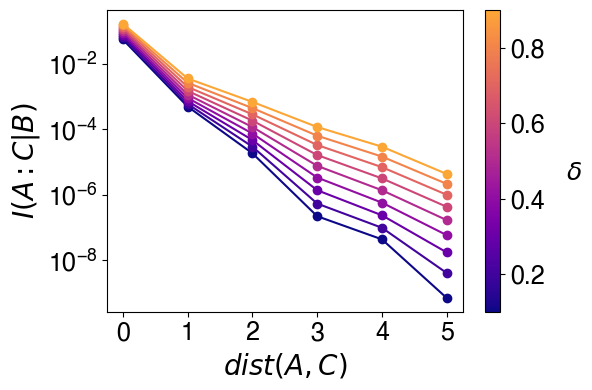

/var/folders/yx/gbqp9vfd6nx38f8tl5_mnfl80000gn/T/ipykernel_10217/1594034636.py:214: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

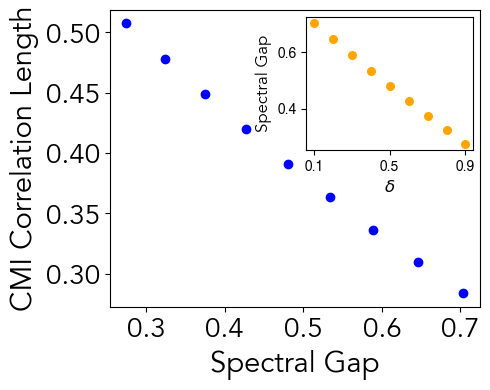

<Figure size 640x480 with 0 Axes>

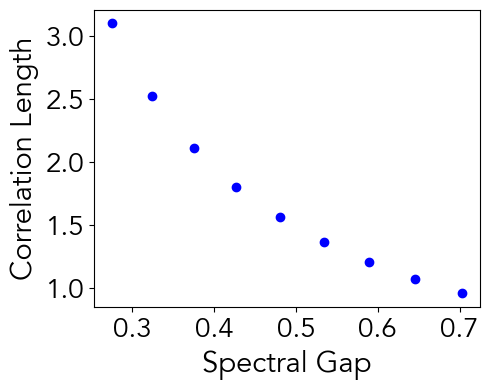

<Figure size 640x480 with 0 Axes>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
  
# from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit
from matplotlib.ticker import MaxNLocator



colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

# Dictionary to store the loaded arrays
L = 4
N = L*L
cmi = {}
mean_corr= {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}
stagger_mag = {}
# Looping through the values and loading each file
for param in params:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi[param] = np.load(filename)
    cmi[param] = cmi[param][cmi[param]>1e-13]
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mean_corr[param] = np.load(filename)
    filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    var_corr[param] = np.load(filename)
    var_corr[param] = var_corr[param][mean_corr[param]>1e-13]
    mean_corr[param] = mean_corr[param][mean_corr[param]>1e-13]

    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    gap[param] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi_traceout[param] = np.load(filename, allow_pickle=True)
    for j in range(len(cmi_traceout[param])):
        cmi_traceout[param][j] = np.array(cmi_traceout[param][j])[np.array(cmi_traceout[param][j])>1e-13]
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mag[param] = np.load(filename)
    filename = f"result/{model}/stagger_mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    stagger_mag[param] = np.load(filename)






cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range (len(params))]
err_cmi_length_traceout = [[] for i in range (len(params))]
for i in params:
    df = len(cmi[i])-2
    if df>=1:
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x)**2))
        cmi_length.append(1/cmi_len)
        err_cmi_length.append(1/cmi_len**2*err)

    df = len(mean_corr[i])-2
    if df >=1:
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(np.abs(mean_corr[i])), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x)**2))
        corre_length.append(1/corr_len)
        err_corre_length.append(1/corr_len**2*err)

    for j in range(len(cmi_traceout[i])):
        df = len(cmi_traceout[i][j])-2
        if df>=1:
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])), -np.log(cmi_traceout[i][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x)**2))
            cmi_length_traceout[params.index(i)].append(cmi_len)
            err_cmi_length_traceout[params.index(i)].append(err)


for i in params:
    stagger_mag[i] = stagger_mag[i]
    plt.scatter(i, stagger_mag[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("stagger_magnetization")
plt.legend()
plt.savefig("figure/"+model+"/stagger_mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()



# Choose the original colormap
original_cmap = plt.cm.viridis
original_cmap = plt.cm.plasma
# Choose the range of the colormap you want to use
# For example, use colors from 10% to 90% of the colormap
start = 0.00
stop = 0.80
number_of_colors = 256  # Use more for smoother gradients

# Create a new list of colors from the original colormap
colors = original_cmap(np.linspace(start, stop, number_of_colors))

# Create a new colormap from the list of colors
new_cmap = LinearSegmentedColormap.from_list(
    'truncated_viridis', colors
)
# plotting code
plt.figure(figsize=(6, 4))
mpl.rcParams['font.family'] = 'Helvetica'


norm = Normalize(vmin=min(params), vmax=max(params))
cmap = new_cmap  

for a in params:
    i = (a)
    color = cmap(norm(a))  # Map the Jv value to a color
    plt.semilogy(cmi[i], marker='o', color=color)

plt.xlabel(r"$dist(A,C)$", fontsize=20)
plt.ylabel(r"$ I(A:C|B)$", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Create a ScalarMappable and initialize a Normalize object
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(np.linspace(min(abs(np.array(params))), max(abs(np.array(params))), 256))

# Create the 'heatmap' legend by calling colorbar
ax = plt.gca()  # Get the current axes
cbar = plt.colorbar(sm, orientation='vertical', ax=ax)

# Adjust the font size of the colorbar tick labels and set label
cbar.ax.tick_params(labelsize=18)
cbar.set_label(r'$\quad\quad \delta$', rotation=0, fontsize=18)


plt.tight_layout()
plt.savefig("figure/2DRydberg/cmi_twoD_L"+str(L)+"_periodic_"+str(periodic)+".pdf")
plt.show()
plt.clf()
    
   
 
gap_list = []
params_abs = []
for i in params:
    if len(cmi[i])>=3:
        gap_list.append(gap[i])
        params_abs.append(abs(i))

# Customization parameters
font_size = 20  # Example size
font_family = 'Avenir'  # Example font family
marker_type = 'o'  # Circle markers
marker_color = 'blue'  # Blue color for scatter plot
marker_size = 30  # Size of markers
errorbar_color = 'gray'  # Green color for error bars

# Main plot (Error bar plot)

plt.figure(figsize=(5, 4))
# plt.errorbar(gap_list, cmi_length, yerr=err_cmi_length[:][0], fmt=marker_type, color=marker_color, ecolor=errorbar_color, capthick=1, capsize=10)
plt.errorbar(gap_list, cmi_length, fmt=marker_type, color=marker_color, ecolor=errorbar_color, capthick=1, capsize=10)
plt.xlabel("Spectral Gap", fontsize=21, fontname=font_family)
plt.ylabel("CMI Correlation Length", fontsize=21, fontname=font_family)

# Set the maximum number of y-ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed

plt.xticks(fontsize=20,fontname=font_family)
plt.yticks(fontsize=20, fontname=font_family)


# plt.yticks([0.345, 0.38, 0.41])
# plt.xticks([0.2, 0.32, 0.45])


# Create an inset (Scatter plot)
ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc='upper right')
# ax_inset = inset_axes(plt.gca(), width="150%", height="150%",       bbox_to_anchor=(0.72, 0.70, 0.3, 0.3),  # Shift left from the very corner
#                       bbox_transform=ax.transAxes)
ax_inset.scatter(params_abs, gap_list, label="Spectral Gap vs $J$", marker=marker_type, color='orange', s=marker_size)

ax_inset.set_xlabel("$\delta$", fontsize=12, fontname=font_family)
ax_inset.set_ylabel("Spectral Gap", fontsize=12, fontname=font_family)

# Set custom x-ticks for the inset plot
# Example: Generate 5 evenly spaced ticks from min to max of J
inset_xticks = np.linspace(min(params_abs), max(params_abs), 3)
# inset_xticks = [0, 0.35, 0.7]

ax_inset.set_xticks(inset_xticks)

ax_inset.tick_params(axis='both', which='major', labelsize=10)

# Adjust the layout
plt.tight_layout()
# Save and show the combined plot
plt.savefig("figure/2DRydberg/combined_plot_L"+str(L)+"_periodic_"+str(periodic)+".pdf")
plt.show()
plt.clf()



plt.figure(figsize=(5, 4))
# plt.errorbar(gap_list, cmi_length, yerr=err_cmi_length[:][0], fmt=marker_type, color=marker_color, ecolor=errorbar_color, capthick=1, capsize=10)
plt.errorbar(gap_list, corre_length, fmt=marker_type, color=marker_color, ecolor=errorbar_color, capthick=1, capsize=10)
plt.xlabel("Spectral Gap", fontsize=21, fontname=font_family)
plt.ylabel("Correlation Length", fontsize=21, fontname=font_family)

# Set the maximum number of y-ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed

plt.xticks(fontsize=20,fontname=font_family)
plt.yticks(fontsize=20, fontname=font_family)

# Adjust the layout
plt.tight_layout()
# Save and show the combined plot
plt.savefig("figure/2DRydberg/corr_length_plot_L"+str(L)+"_periodic_"+str(periodic)+".pdf")
plt.show()
plt.clf()




0
[3.5226161238735907, 3.547426257884018, 3.2303223510991015, 2.7806063563476466, 3.6342634530848836, 4.321979820326953, 4.267814602544885, 3.2182879520721683]


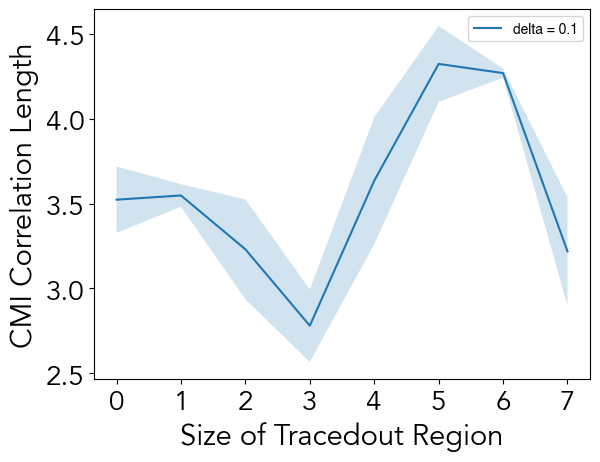

1
[3.229166363763467, 3.376633923665019, 3.0162143112369675, 2.56967418287305, 3.4117698888390073, 4.277282082367509, 3.896857205730613, 2.9501936986355286]


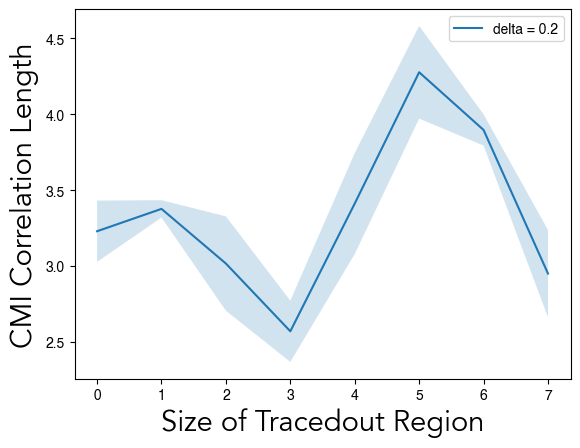

2
[2.9725023398388397, 3.1992544692616907, 2.824788632774796, 2.3837322684784636, 3.1646431340166368, 4.07350252157183, 3.565911546108628, 2.696187624603913]


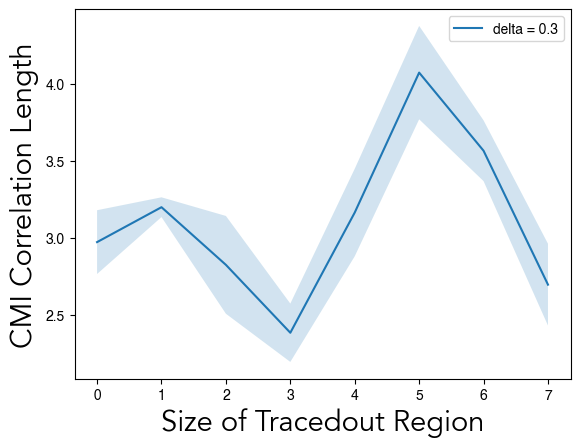

3
[2.750424084723383, 3.0234838741430616, 2.6570583632705245, 2.216851273019145, 2.921071918030363, 3.7784393342896467, 3.2702068050470334, 2.4584383965247874]


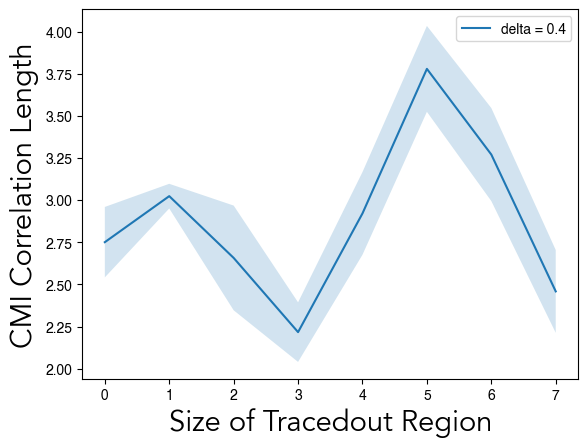

4
[2.555220580902118, 2.854226776800077, 2.509627652461231, 2.06585787269401, 2.69104693061591, 3.4854300202208934, 3.005285540928176, 2.2376657888830627]


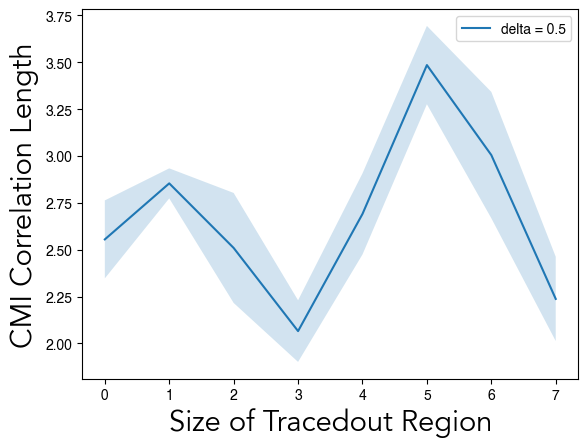

5
[2.3822070441011203, 2.6940660947324626, 2.3783725226533083, 1.9289261528369888, 2.4785603932651306, 3.220008079011836, 2.7696133403292604, 2.0344042018809194]


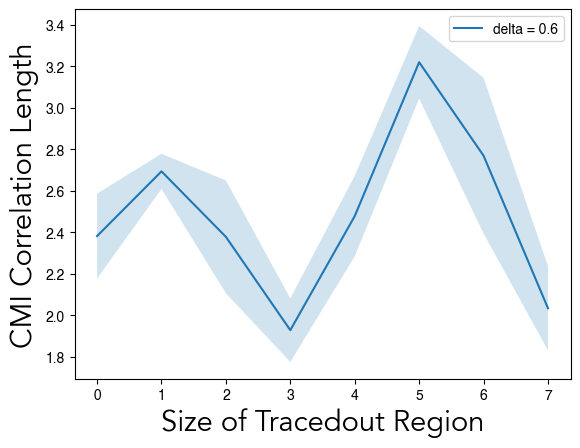

6
[2.2283280873384843, 2.544240199306117, 2.2603200428072507, 1.8049757496458678, 2.285648068106412, 2.983106601822724, 2.5626458657276268, 1.8493435020774085]


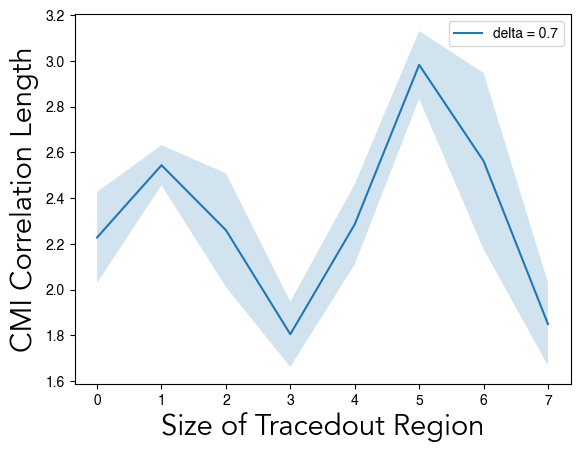

7
[2.091529754926535, 2.405452897784708, 2.1539377506964277, 1.6934914839140995, 2.1135243624557547, 2.7719244918284462, 2.382990185588117, 1.683485631773531]


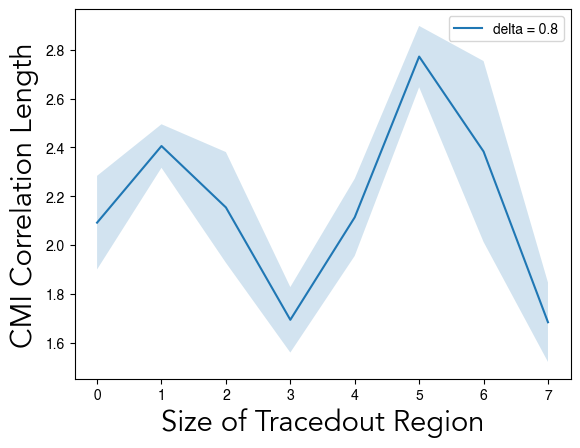

8
[1.9706557129957685, 2.278557446861451, 2.0589817308650833, 1.594571718598905, 1.963115953210426, 2.584579881477901, 2.22844020020073, 1.5382981056415244]


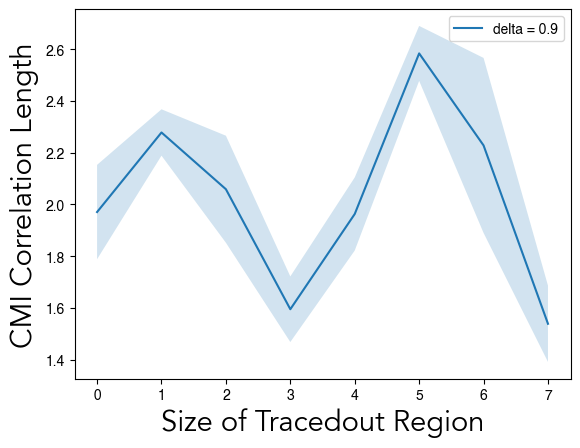

<Figure size 640x480 with 0 Axes>

In [35]:

# Customization parameters
font_size = 20  # Example size
font_family = 'Avenir'  # Example font family
marker_type = 'o'  # Circle markers
marker_color = 'blue'  # Blue color for scatter plot
marker_size = 30  # Size of markers
errorbar_color = 'gray'  # Green color for error bars

# Set the maximum number of y-ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed
# plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust 'nbins' as needed


plt.xticks(fontsize=20,fontname=font_family)
plt.yticks(fontsize=20, fontname=font_family)


for i in range(len(params)):
    print(i)
    print(cmi_length_traceout[i])
    if len(cmi_length_traceout[i])>=3:
        cmi_length_traceout[i] = np.array(cmi_length_traceout[i])
        err_cmi_length_traceout[i] = np.array(err_cmi_length_traceout[i]).ravel()
        plt.plot(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(params[i]))
        plt.fill_between(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i] - err_cmi_length_traceout[i],
                         cmi_length_traceout[i] + err_cmi_length_traceout[i], alpha=0.2)
        plt.xlabel("Size of Tracedout Region", fontsize=21, fontname=font_family)
        plt.ylabel("CMI Correlation Length", fontsize=21, fontname=font_family)
        plt.legend()
        plt.savefig("figure/2DRydberg/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(params[i]) + "periodic_" + str(
                periodic) + ".pdf")
        plt.show()
        plt.clf()